# Homework 4
### Tristan Larkin
### (Due Date: Monday, Feb. 27)

## Problem 1
Write a Matlab (or Mathematica) program to fit a set of four runs of data shown in the figure to a straight line using the method of maximum likelihood estimation (MLE). Obtain the slope “$m$” and intercept “$b$” of the line, and their estimated errors $\sigma m$ and $\sigma b$. Note that to perform the fit you need first to calculate the mean ($Y_{ave}$) and standard deviation ($\sigma$) for data points “$y$” corresponding to each position of the independent variable “x”. 

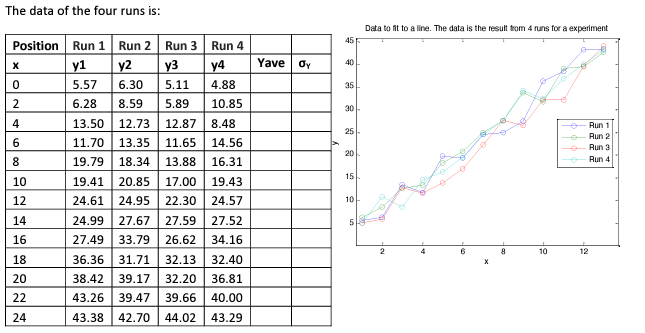

In [78]:
import numpy as np
from tabulate import tabulate

x  = np.array([0,2,4,6,8,10,12,14,16,18,20,22,24])
y1 = np.array([5.57, 6.28, 13.50, 11.70, 19.79, 19.41, 24.61, 24.99, 27.49, 36.36, 38.42, 43.26, 43.38])
y2 = np.array([6.30, 8.59, 12.73, 13.35, 18.34, 20.85, 24.95, 27.67, 33.79, 31.71, 39.17, 39.47, 42.70])
y3 = np.array([5.11, 5.89, 12.87, 11.65, 13.88, 17.00, 22.30, 27.59, 26.62, 32.13, 32.20, 39.66, 44.02])
y4 = np.array([4.88, 10.85, 8.48, 14.56, 16.31, 19.43, 24.57, 27.52, 34.16, 32.40, 36.81, 40.00, 43.29])

In your homework provide\
\
a) The Matlab file with comments describing the command lines in the program.  \
\
b) A plot showing the average data with error bars indicating the standard deviations and the fitted line. The plot should show legends and an inset describing the equation of the line with the values of the slope and intercept with the corresponding errors. Include labels in axes. \
\
**IMPORTANT**: do not use predefined functions “mean” or “std” and do not use automatic fit tools. Instead, use the formulas seen in class for calculating the slope, intersect and their errors. Also you can check the formulas in Bevington CH 6 Sections 6.3-6.4. 

Here are the formulas for mean and std are given by:
$$ \bar{x} = \frac{1}{N} \sum_{i=1}^{N}x_i $$
$$ \sigma = \sqrt{\frac{1}{N-1}\sum_{i=1}^{N} (\bar{x}-x_i)^2} $$


Before I start, I want to explain the idea of a list comprehension.\
A list comprehension is in the form: `[f(x) for x in xs]` where `xs` is an array and `f` is a function. This will create a list for every element in `xs`, like `[f(x1), f(x2), ..., f(xn)]`. 

In [85]:
from typing import Callable
import matplotlib.pyplot as plt

def mean(xs:list[float]) -> float:
    s = sum([x for x in xs]) # list comprehension will follow the pattern and the sum just adds
    N = len(xs) # length of xs
    return s/N

def std(xs:list[float]) -> float:
    xbar = mean(xs)
    s = sum([(x-xbar)**2 for x in xs])
    N = len(xs)
    return np.sqrt(s/(N-1)) # we use N-1 for the bias corrected version

In [80]:
m = np.transpose(np.concatenate(([y1],[y2],[y3],[y4]))) # matrix of the y values
means = np.array([mean(qs) for qs in m]) # mean of each row in the matrix m
stds = np.array([std(qs) for qs in m]) # std for each row in the matrix m

headers = ['x', 'y1', 'y2', 'y3', 'y4', 'mean', 'std']
print(tabulate(np.transpose(np.concatenate(([x],[y1],[y2],[y3],[y4],[means],[stds]))), headers=headers))


  x     y1     y2     y3     y4     mean       std
---  -----  -----  -----  -----  -------  --------
  0   5.57   6.3    5.11   4.88   5.465   0.626232
  2   6.28   8.59   5.89  10.85   7.9025  2.29805
  4  13.5   12.73  12.87   8.48  11.895   2.30117
  6  11.7   13.35  11.65  14.56  12.815   1.40614
  8  19.79  18.34  13.88  16.31  17.08    2.56675
 10  19.41  20.85  17     19.43  19.1725  1.59755
 12  24.61  24.95  22.3   24.57  24.1075  1.217
 14  24.99  27.67  27.59  27.52  26.9425  1.30311
 16  27.49  33.79  26.62  34.16  30.515   4.01386
 18  36.36  31.71  32.13  32.4   33.15    2.15875
 20  38.42  39.17  32.2   36.81  36.65    3.12577
 22  43.26  39.47  39.66  40     40.5975  1.78849
 24  43.38  42.7   44.02  43.29  43.3475  0.540332


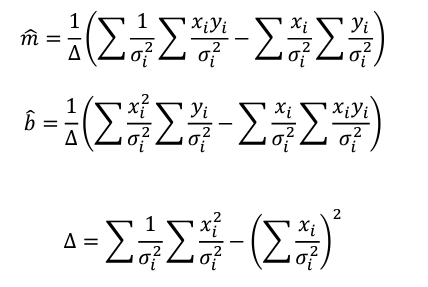

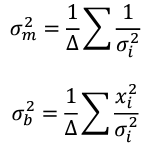

In [182]:
# All of these functions are just python trnascripts of the functions above.

# this function is the DELTA in the formula
def delta(xs, ys, stds) -> float: 
    a = sum([1/sig**2 for sig in stds])
    b = sum([x**2/sig**2 for sig, x in zip(stds, xs)])
    c = sum([x/sig**2 for sig, x in zip(stds, xs)])
    return a*b - c**2

# this calculates the m hat in the formula
def m_fit(xs, ys, stds) -> float:
    a = sum([1/sig**2 for sig in stds])
    b = sum([x*y/sig**2 for x, y, sig in zip(xs,ys,stds)])
    c = sum([x/sig**2 for x, sig in zip(xs,stds)])
    d = sum([y/sig**2 for y, sig in zip(ys,stds)])
    return (a*b - c*d)/delta(xs, ys, stds)
    
# this calculates the b hat in the formula
def b_fit(xs, ys, stds) -> float:
    a = sum([x**2/sig**2 for x, sig in zip(xs, stds)])
    b = sum([y/sig**2 for y, sig in zip(ys,stds)])
    c = sum([x/sig**2 for x, sig in zip(xs,stds)])
    d = sum([x*y/sig**2 for x, y, sig in zip(xs,ys,stds)])
    return (a*b - c*d)/delta(xs, ys, stds)

# returns a function in the form f(x) = mx + b
def fit_line(xs, ys, stds) -> Callable:
    m = m_fit(xs,ys,stds)
    b = b_fit(xs,ys,stds)
    f = lambda x: m*x + b
    return f

# uncertainty in b
def sigma_m(xs, ys, stds) -> float:
    a = sum([1/sig**2 for sig in stds])
    return np.sqrt(a/delta(xs, ys, stds))

# uncertainty in m
def sigma_b(xs, ys, stds) -> float:    
    a = sum([x**2/sig**2 for x, sig in zip(xs, stds)])
    return np.sqrt(a/delta(xs, ys, stds))

print(f"The uncertainty of b for the best fit line is {sigma_b(x, means, stds):.2}.")
print(f"The uncertainty of fm for the best fit line is {sigma_m(x, means, stds):.2}.")

The uncertainty of b for the best fit line is 0.18.
The uncertainty of fm for the best fit line is 0.00031.


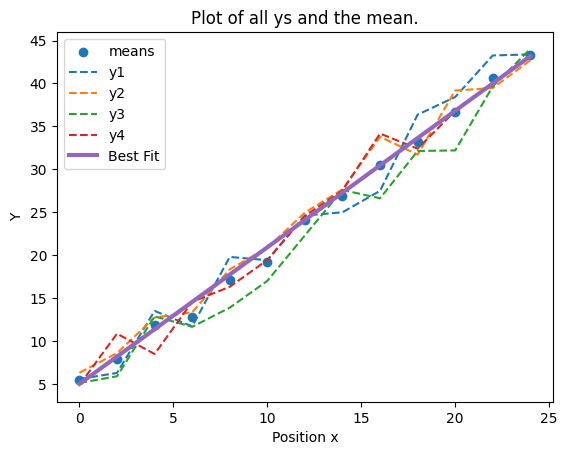

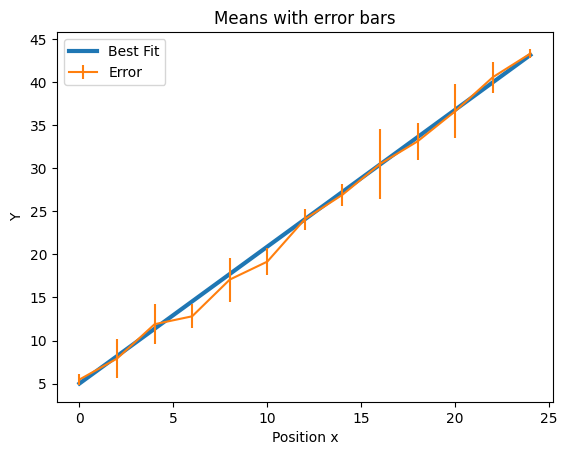

In [124]:
f = fit_line(x, means, stds)

plt.scatter(x, means)
lgd = ["means"]

for i, y in enumerate(np.transpose(m), start=1):
    plt.plot(x, y, '--')
    lgd.append(f"y{i}")

plt.plot(x, f(x), linewidth=3)
lgd.append("Best Fit")

plt.legend(lgd)
plt.title("Plot of all ys and the mean.")
plt.xlabel("Position x")
plt.ylabel("Y")
plt.show()

plt.plot(x, f(x), linewidth=3)
lgd.append("Best Fit")

plt.errorbar(x, means, stds)
plt.title("Means with error bars")
plt.legend(["Best Fit", "Error"])
plt.xlabel("Position x")
plt.ylabel("Y")
plt.show()

## Problem 2 (Bevington 6.5) 
A student hangs masses on a spring and measures the spring's extension as a function of the applied force in order to find the spring constant $k$. Her measurements are: 

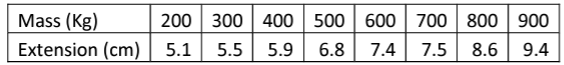

There is an uncertainty of 0.2 in each measurement of the extension. The uncertainty in the masses is negligible. For a perfect spring, the extension Δ 𝐿 of the spring will be related to the applied force by the relation “𝑘 Δ 𝐿 = 𝐹”, where 𝐹 = 𝑚𝑔, and Δ 𝐿 = 𝐿 − 𝐿 , and 𝐿 is the unstretched length of the spring. Use these data and the method of “Maximum Likelihood estimation” to find the spring constant 𝑘, the unstretched length of the spring 𝐿, and their uncertainties. \
\
Repeat the requests from “a” and “b” from the last problem (problem 1) taking the average data as the “Extension (cm)” from the table above. 

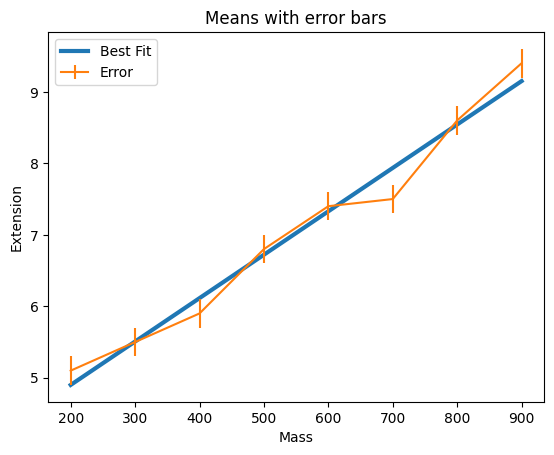

In [183]:
mass       = [200, 300, 400, 500, 600, 700, 800, 900] # kg
extensions = [5.1, 5.5, 5.9, 6.8, 7.4, 7.5, 8.6, 9.4] # cm
sigma_ext  = [0.2] * len(extensions) # cm

x = np.array(mass)
means = np.array(extensions)
stds = np.array(sigma_ext)

f = fit_line(x, means, stds)

plt.plot(x, f(x), linewidth=3)
lgd.append("Best Fit")

plt.errorbar(x, means, stds)
plt.title("Means with error bars")
plt.legend(["Best Fit", "Error"])
plt.xlabel("Mass")
plt.ylabel("Extension")
plt.show()

We want to find $k$ and $L_0$. 
$$ k(L-L_0) = F = Mg $$
$$ L - L_0 = \frac{g}{k}M $$
$$ L = \frac{g}{k}M + L_0 $$
So if we call $m$ the slope we can say $ \dfrac{g}{k} = m $ and we can rearange that to get $ \dfrac{g}{m} = k $ and $L_0$ is our $b$ value. 


In [180]:
args = (x, means, stds)

m = m_fit(*args) # m/kg
b = b_fit(*args) # m
g = 9.81         # m/s^2
k = g/m          # N/m

sigma_k = g * m**(-2) * sigma_m(*args) 

print(f"The slope of the best fit line is {m:.2} m/kg.")
print(f"The value for L_0 is {b:.2} m.")
print(f"The spring constant is {k:.1e} N/m.")

print(f"The uncertainty in L_0 is {sigma_b(*args):.2} m.")
print(f"The uncertainty in k is {sigma_k:.0f} N/m.")

The slope of the best fit line is 0.0061 m/kg.
The value for L_0 is 3.7 m.
The spring constant is 1.6e+03 N/m.
The uncertainty in L_0 is 0.18 m.
The uncertainty in k is 82 N/m.
